In [1]:
import numpy as np
import MRzeroCore as mr0
import pypulseq as pp
import torch
import matplotlib.pyplot as plt

C:\ProgramData\Miniconda3\envs\mrzero\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [8]:
sz = [64, 64]
dB0 = 470 #@param {title:'dB0',type:"slider", min:0, max:500, step:10}
phantom = mr0.VoxelGridPhantom.load_mat(rf'phantom\numerical_brain_cropped.mat')
phantom = phantom.interpolate(sz[0], sz[1], 1)
# phantom.plot()
data = phantom.build()

In [4]:
seq_path = rf"seq\ex11_gre_demo_1d_zheng.seq"
seq = pp.Sequence()
seq.read(seq_path)

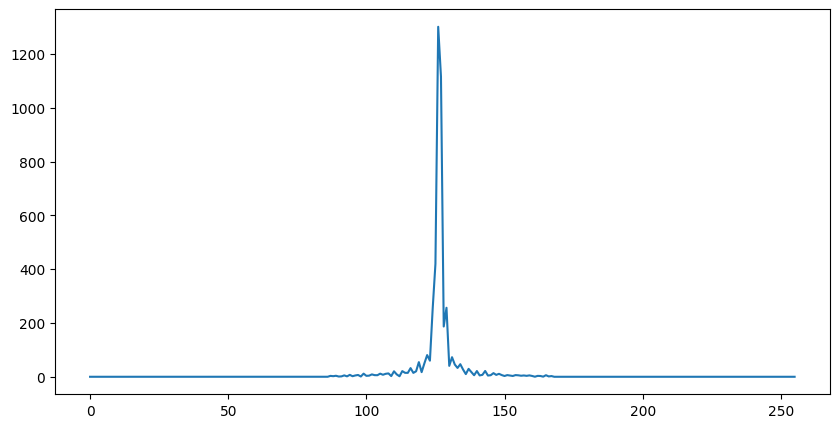

In [10]:
signal, kspace = mr0.util.simulate(seq, phantom)
plt.plot(signal.abs())

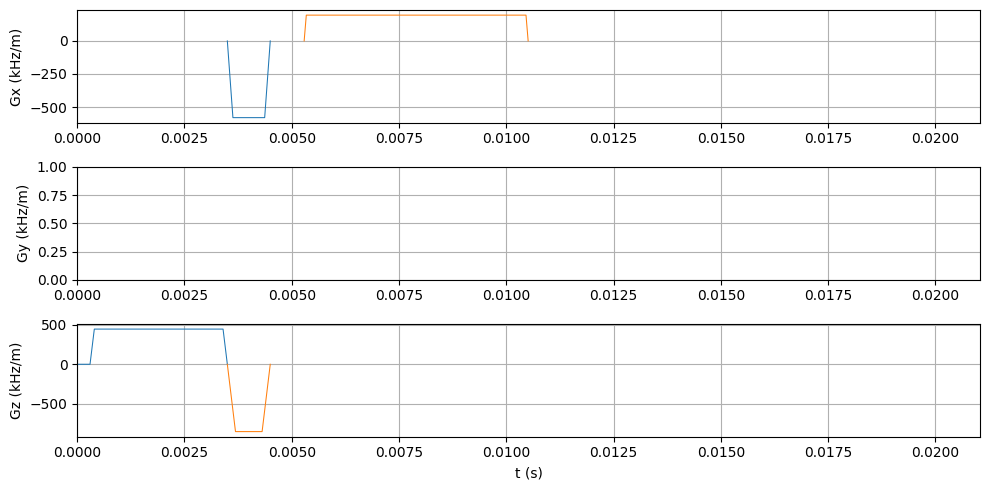

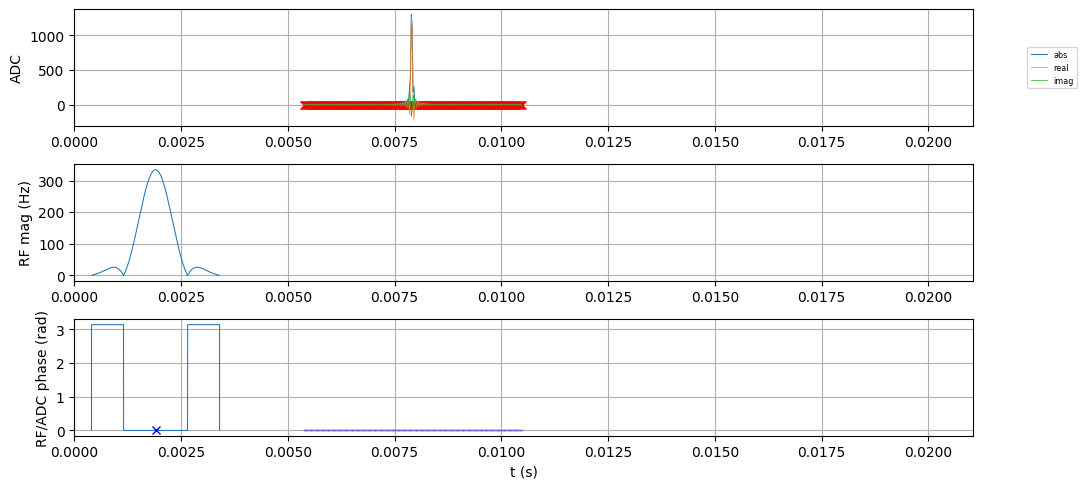

In [11]:
seq.plot(plot_now=False)
mr0.util.insert_signal_plot(seq=seq, signal=signal.numpy())